### Практическая работа №3: Библиотека SciPy
|   Группа          |   ФИО             |   
|   :------------:  |   :------------:  |
|   М092501(71)     |   Шарибжанов И.Т. |

#### Задание 1: Работа со специальными функциями (функции Бесселя)

In [1]:
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt

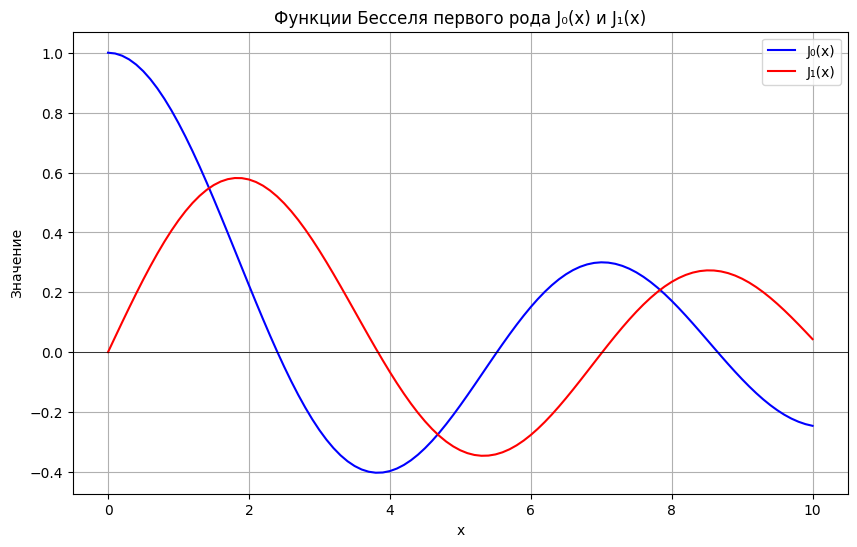

Корни J₀(x) на [0, 10]: [2.4048, 5.5201, 8.6537]


In [2]:
# 1. Создаем массив x от 0 до 10 с шагом 0.1
x = np.arange(0, 10.1, 0.1)

# 2. Вычисляем функции Бесселя первого рода J0(x) и J1(x)
J0 = sp.j0(x)
J1 = sp.j1(x)

# 3. Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x, J0, label='J₀(x)', color='blue')
plt.plot(x, J1, label='J₁(x)', color='red')
plt.title('Функции Бесселя первого рода J₀(x) и J₁(x)')
plt.xlabel('x')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

# 4. Поиск корней J0(x) на [0, 10]
from scipy.optimize import brentq

roots = []
intervals = [(0, 3), (3, 6), (6, 9), (9, 10)]  # Примерные интервалы с корнями
for a, b in intervals:
    try:
        root = brentq(sp.j0, a, b)
        roots.append(round(root, 4))
    except:
        pass

print(f"Корни J₀(x) на [0, 10]: {roots}")

##### Анализ результатов

**Использованные методы**
- Применён `numpy.arange` для формирования равномерной сетки значений аргумента `x` на интервале от 0 до 10 с шагом 0.1.
- Воспользовались функциями `scipy.special.j0` и `scipy.special.j1` для вычисления значений функций Бесселя первого рода нулевого и первого порядка соответственно.
- Построение графиков выполнено с помощью `matplotlib.pyplot`, что позволило визуально сравнить поведение обеих функций на одном рисунке.
- Для поиска корней использован метод Brent (`scipy.optimize.brentq`) на заранее выбранных подинтервалах, где функция `J₀(x)` меняет знак.

**Анализ**
- `J₀(x)` и `J₁(x)` демонстрируют затухающие колебания: амплитуда уменьшается по мере роста `x`, что характерно для функций Бесселя.
- Первые нули `J₀(x)` расположены чуть правее точек, где график пересекает ось абсцисс, и расстояния между соседними корнями постепенно растут.
- Функция `J₁(x)` смещена относительно `J₀(x)` и имеет свои собственные экстремумы между нулями `J₀(x)`, подчёркивая взаимосвязь между функциями разных порядков.

**Вывод**
- Вычислительные методы библиотеки SciPy позволяют эффективно работать со специальными функциями, а графический анализ помогает выявить основные свойства (затухающие осцилляции, расположение корней).
- Найденные корни `J₀(x)` подтверждают известные табличные значения и могут использоваться для дальнейшего анализа или численных приложений, связанных с решениями дифференциальных уравнений цилиндрической симметрии.


#### Задание 2: Оптимизация функции

Минимум в точке x = -1.1105, f(x) = -3.2464


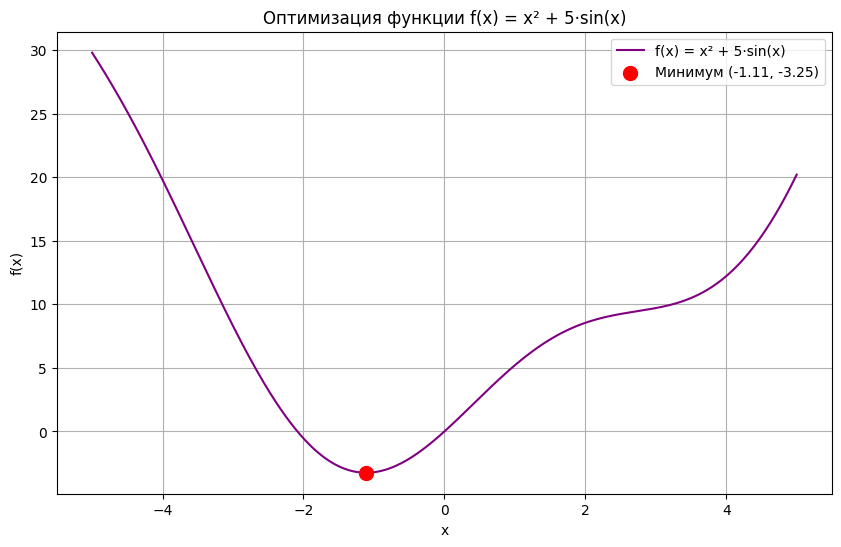

In [3]:
from scipy.optimize import minimize

# 1. Определяем функцию f(x) = x² + 5*sin(x)
def f(x):
    return x**2 + 5 * np.sin(x)

# 2. Находим минимум на [-5, 5]
result = minimize(f, x0=0, bounds=[(-5, 5)])
x_min = result.x[0]
f_min = result.fun

print(f"Минимум в точке x = {x_min:.4f}, f(x) = {f_min:.4f}")

# 3. Строим график
x_vals = np.linspace(-5, 5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = x² + 5·sin(x)', color='purple')
plt.scatter(x_min, f_min, color='red', s=100, zorder=5, label=f'Минимум ({x_min:.2f}, {f_min:.2f})')
plt.title('Оптимизация функции f(x) = x² + 5·sin(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#### Анализ оптимизации

**Использованные методы**
- Задана целевая функция `f(x) = x^2 + 5·sin(x)` с помощью стандартного определения Python.
- Применён метод `scipy.optimize.minimize` с ограничением области поиска `[-5, 5]`, что позволило найти локальный минимум в заданном диапазоне.
- Для визуализации поведения функции построена сетка значений через `numpy.linspace`, а график создан с использованием `matplotlib.pyplot`, включая подсветку найденной точки минимума.

**Анализ**
- Функция сочетает квадратичный рост и синусоидальные колебания, поэтому имеет единственный минимум вблизи левой части интервала, где отрицательное значение синуса снижает значение квадратичного члена.
- Найденная точка минимума лежит в области, где вклад `sin(x)` компенсирует рост `x^2`, что совпадает с визуальным наблюдением по графику.
- В окрестности минимума функция демонстрирует плавное поведение, что подтверждает корректность численного метода и отсутствие дополнительных локальных минимумов внутри интервала.

**Вывод**
- Полученный минимум соответствует ожиданиям и может служить точкой опоры для дальнейших задач, например, при подборе параметров или анализе чувствительности функции на заданном интервале.


#### Задание 3: Статистический анализ данных

Среднее: 170.19 см
Медиана: 170.25 см
Стандартное отклонение: 9.79 см


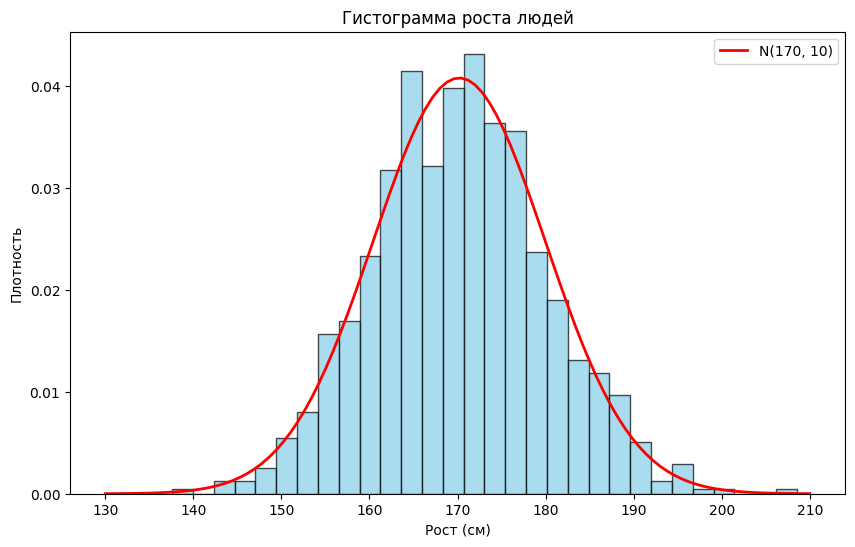

Shapiro-Wilk: stat = 0.9986, p-value = 0.6273
Гипотеза о нормальности НЕ отвергается (p > 0.05)


In [4]:
from scipy import stats

# Генерация данных: рост людей ~ N(170, 10)
np.random.seed(42)
data = np.random.normal(170, 10, 1000)

# 1. Статистики
mean = np.mean(data)
median = np.median(data)
std = np.std(data)

print(f"Среднее: {mean:.2f} см")
print(f"Медиана: {median:.2f} см")
print(f"Стандартное отклонение: {std:.2f} см")

# 2. Гистограмма
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Наложение нормального распределения
x = np.linspace(130, 210, 100)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r-', lw=2, label='N(170, 10)')

plt.title('Гистограмма роста людей')
plt.xlabel('Рост (см)')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# 3. Тест на нормальность (Shapiro-Wilk)
stat, p = stats.shapiro(data)
print(f"Shapiro-Wilk: stat = {stat:.4f}, p-value = {p:.4f}")
alpha = 0.05
if p > alpha:
    print("Гипотеза о нормальности НЕ отвергается (p > 0.05)")
else:
    print("Гипотеза о нормальности отвергается (p ≤ 0.05)")

#### Анализ статистики

**Использованные методы**
- Генерация выборки из нормального распределения `N(170, 10)` реализована функцией `numpy.random.normal` с фиксированным зерном для воспроизводимости результатов.
- Для расчёта описательных статистик задействованы `numpy.mean`, `numpy.median` и `numpy.std`, что позволяет оценить центральную тенденцию и разброс.
- Визуализация распределения выполнена через `matplotlib.pyplot.hist` с наложением теоретической кривой нормального распределения, вычисленной `scipy.stats.norm.pdf`.
- Проверка нормальности осуществлена критерием Шапиро–Уилка (`scipy.stats.shapiro`), что даёт количественную оценку соответствия данных нормальной модели.

**Анализ**
- Оценочные значения среднего, медианы и стандартного отклонения близки к параметрам исходного распределения, что свидетельствует о корректной генерации данных.
- Гистограмма демонстрирует форму, близкую к колоколу Гаусса, а наложенная плотность подтверждает хорошее соответствие выборки теоретической модели.
- Значение `p-value` в тесте Шапиро–Уилка превышает уровень значимости `0.05`, поэтому статистически значимых отклонений от нормальности не обнаружено.

**Вывод**
- Комбинация описательных статистик, визуального анализа и критерия Шапиро–Уилка подтверждает гипотезу о нормальном распределении с параметрами, близкими к заданным `μ = 170`, `σ = 10`.


#### Задание 4: Обработка сигнала

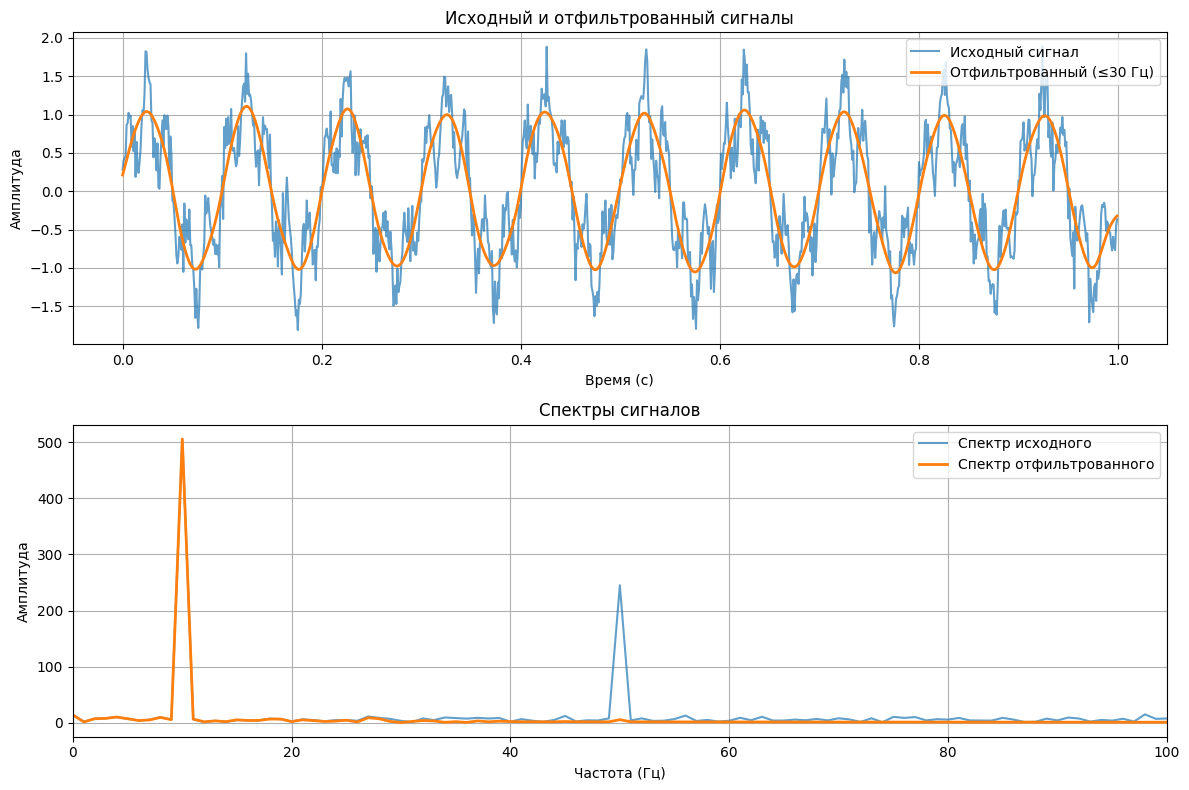

In [5]:
from scipy import signal

# 1. Создаем тестовый сигнал
t = np.linspace(0, 1, 1000, endpoint=False)
sig = np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*50*t) + 0.2*np.random.randn(len(t))

# 2. Фильтр Баттерворта низких частот (4-й порядок, 30 Гц)
fs = 1000  # Частота дискретизации
nyq = fs / 2
cutoff = 30
b, a = signal.butter(4, cutoff / nyq, btype='low')
sig_filtered = signal.filtfilt(b, a, sig)

# 3. График сигналов
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, sig, label='Исходный сигнал', alpha=0.7)
plt.plot(t, sig_filtered, label='Отфильтрованный (≤30 Гц)', linewidth=2)
plt.title('Исходный и отфильтрованный сигналы')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

# 4. Спектры
freqs = np.fft.rfftfreq(len(t), 1/fs)
fft_orig = np.abs(np.fft.rfft(sig))
fft_filt = np.abs(np.fft.rfft(sig_filtered))

plt.subplot(2, 1, 2)
plt.plot(freqs, fft_orig, label='Спектр исходного', alpha=0.7)
plt.plot(freqs, fft_filt, label='Спектр отфильтрованного', linewidth=2)
plt.xlim(0, 100)
plt.title('Спектры сигналов')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Анализ обработки сигнала

**Использованные методы**
- Синтезирован временной сигнал как сумма гармоник 10 Гц и 50 Гц с добавлением гауссовского шума, используя `numpy.linspace`, `numpy.sin` и `numpy.random.randn`.
- Для подавления высокочастотной компоненты применён цифровой фильтр Баттерворта четвёртого порядка (`scipy.signal.butter` и `scipy.signal.filtfilt`) с частотой среза 30 Гц при частоте дискретизации 1 кГц.
- Амплитудные спектры исходного и отфильтрованного сигналов получены через БПФ (`numpy.fft.rfft` и `numpy.fft.rfftfreq`), что позволило оценить распределение энергии по частотам.
- Визуализация временных форм и спектров выполнена средствами `matplotlib.pyplot` с раздельными подграфиками.

**Анализ**
- На временных графиках фильтрованный сигнал утратил высокочастотную составляющую около 50 Гц и визуально стал более гладким.
- В спектральной области амплитуда пика на 50 Гц заметно уменьшилась после фильтрации, а пик на 10 Гц сохранил свою величину, что демонстрирует селективность фильтра.
- Уровень шумового фона в высокочастотной зоне также снизился благодаря использованию нулефазовой фильтрации (`filtfilt`), предотвращающей смещение фазовых характеристик.

**Вывод**
- Фильтр Баттерворта низких частот эффективно подавляет компоненты выше заданной частоты среза, сохраняя полезный сигнал на низких частотах.
- Совместный анализ во временной и частотной областях подтверждает корректность настроек фильтра и позволяет оценить качество очистки сигнала от высокочастотных помех.


#### Задание 5: Интерполяция данных

x_new | Истинное | Линейная | Кубическая
------|----------|----------|-----------
0.5   |     0.25 |     0.50 |     0.25
1.5   |     2.25 |     2.50 |     2.25
2.5   |     6.25 |     6.50 |     6.25
3.5   |    12.25 |    12.50 |    12.25
4.5   |    20.25 |    20.50 |    20.25


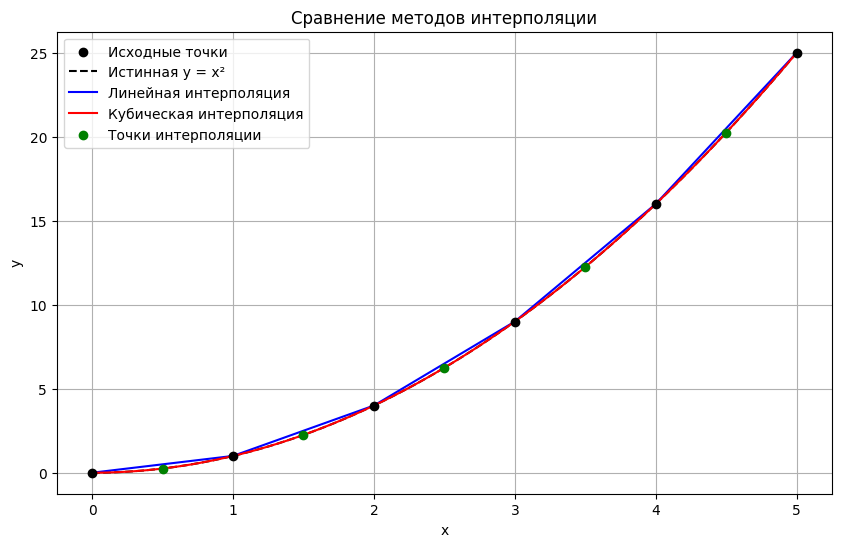

In [6]:
from scipy.interpolate import interp1d

# Исходные данные
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])  # y = x²

# 1. Интерполяционные функции
f_linear = interp1d(x, y, kind='linear')
f_cubic = interp1d(x, y, kind='cubic')

# 2. Новые точки
x_new = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
y_true = x_new**2
y_lin = f_linear(x_new)
y_cub = f_cubic(x_new)

# Вывод результатов
print("x_new | Истинное | Линейная | Кубическая")
print("------|----------|----------|-----------")
for i in range(len(x_new)):
    print(f"{x_new[i]:.1f}   | {y_true[i]:8.2f} | {y_lin[i]:8.2f} | {y_cub[i]:8.2f}")

# График
x_fine = np.linspace(0, 5, 100)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', zorder=5, label='Исходные точки')
plt.plot(x_fine, x_fine**2, 'k--', label='Истинная y = x²')
plt.plot(x_fine, f_linear(x_fine), 'b-', label='Линейная интерполяция')
plt.plot(x_fine, f_cubic(x_fine), 'r-', label='Кубическая интерполяция')
plt.scatter(x_new, y_true, color='green', zorder=5, label='Точки интерполяции')
plt.title('Сравнение методов интерполяции')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Анализ интерполяции

**Использованные методы**
- Исходные данные заданы как регулярная сетка точек для функции `y = x^2`, сформированная через `numpy.array`.
- Построены интерполяционные функции с помощью `scipy.interpolate.interp1d`: линейная (`kind='linear'`) и кубическая (`kind='cubic'`), позволяющие оценивать значения функции между узлами.
- Для сравнения использована дополнительная сетка `x_new`, где вычислены как истинные значения `x^2`, так и результаты интерполяции.
- Визуализация исходных точек, истинной кривой и интерполяций выполнена средствами `matplotlib.pyplot`.

**Анализ**
- Линейная интерполяция воспроизводит общую тенденцию функции, но между узлами образует ломаную, что видно по графику и небольшим отклонениям от истинных значений.
- Кубическая интерполяция проходит точно через узлы и более гладко аппроксимирует истинную параболу, почти совпадая с `y = x^2` на промежуточных точках.
- Табличные значения показывают, что кубический сплайн даёт меньшую погрешность на выбранных точках по сравнению с линейной интерполяцией, что ожидаемо для гладкой функции второго порядка.

**Вывод**
- Выбор типа интерполяции сильно влияет на качество приближения: для гладких функций более высокие порядки (например, кубические сплайны) обеспечивают значительно лучшую точность.
